In [7]:
!pip install xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
hospital_resources = pd.read_csv('./Definitive_Healthcare__USA_Hospital_Beds.csv')
print(hospital_resources.shape)
hospital_resources.head()

(6618, 23)


,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-81.510688,41.133034,3001,Western Reserve Hospital (FKA Summa Western Re...,Short Term Acute Care Hospital,1900 23rd St,NaN,Cuyahoga Falls,OH,44223.0,...,153.0,39153.0,272.0,83.0,12,12,0.0,0.430764,189,2.0
1,-81.500489,41.080189,3002,Summa Health System - Akron Campus,Short Term Acute Care Hospital,525 E Market St,NaN,Akron,OH,44304.0,...,153.0,39153.0,649.0,584.0,64,64,0.0,0.540098,65,30.0
2,-81.589456,41.014805,3003,Summa Health System - Barberton Campus,Short Term Acute Care Hospital,155 5th St Ne,NaN,Barberton,OH,44203.0,...,153.0,39153.0,271.0,158.0,12,12,0.0,0.628819,113,0.0
3,-81.532470,41.078325,3004,Akron General,Short Term Acute Care Hospital,1 Akron General Ave,NaN,Akron,OH,44307.0,...,153.0,39153.0,383.0,383.0,34,34,0.0,0.706661,0,10.0
4,-81.513552,41.096977,3005,Crystal Clinic Orthopaedic Center,Short Term Acute Care Hospital,444 N Main St,NaN,Akron,OH,44310.0,...,153.0,39153.0,94.0,59.0,10,10,0.0,0.431066,35,2.0


In [4]:
ma_hosp_res = hospital_resources.query("HQ_STATE == 'MA'").reset_index().drop(['index'], axis=1)
ma_hosp_res.dropna(subset=['BED_UTILIZATION', 'Potential_Increase_In_Bed_Capac'], axis=0, inplace=True)
print(ma_hosp_res.shape)
ma_hosp_res.head()

(96, 23)


,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
3,-70.914597,41.894393,6257,High Point Hospital,Psychiatric Hospital,52 Oak St,NaN,Middleboro,MA,2346.0,...,23.0,25023.0,72.0,72.0,0,0,0.0,0.755822,0,0.0
4,-71.614944,42.530395,6277,TaraVista Behavioral Health Center,Psychiatric Hospital,85 Patton Rd,NaN,Devens,MA,1434.0,...,27.0,25027.0,108.0,108.0,0,0,0.0,0.698630,0,0.0
5,-70.985320,41.674167,6299,Southcoast Behavioral Health,Psychiatric Hospital,581 Faunce Corner Rd,NaN,Dartmouth,MA,2747.0,...,5.0,25005.0,120.0,120.0,0,0,0.0,0.916804,0,0.0
10,-71.106860,42.375352,5121,Spaulding Hospital for Continuing Medical Care...,Long Term Acute Care Hospital,1575 Cambridge St,NaN,Cambridge,MA,2138.0,...,17.0,25017.0,180.0,180.0,28,28,0.0,0.651081,0,3.0
11,-72.701723,42.110955,5145,Western Massachusetts Hospital,Long Term Acute Care Hospital,91 E Mountain Rd,NaN,Westfield,MA,1085.0,...,13.0,25013.0,100.0,87.0,14,14,0.0,0.845883,13,2.0


In [5]:
mgh_projections = pd.read_csv("MGH_Qventus COVID19 Modeling.csv")
print(mgh_projections.shape)
mgh_projections['Days'] = pd.to_datetime('2020/' + mgh_projections['Days'], format='%Y/%m/%d')
mgh_projections.head()

(261, 8)


,Days,Med-Surg Census,ICU Census,Vents Census,Critical Admissions,Non-Critical Admissions,Cumulative PPE Needed,Cumulative Deaths
0,2020-04-15,76.192088,29.954921,21.133840,4.438018,10.781934,102.076448,8.130886
1,2020-04-16,76.691037,30.151083,21.272237,4.438018,10.781934,204.821350,11.694054
2,2020-04-17,78.423959,30.832381,21.752907,5.386400,13.085977,309.887892,15.283959
3,2020-04-18,81.062119,31.869574,22.484669,6.155061,14.953399,418.488842,18.960034
4,2020-04-19,84.388049,33.177163,23.407201,6.809576,16.543510,531.545624,22.765948


In [6]:
ma_hosp_res.query("HOSPITAL_NAME == 'Massachusetts General Hospital'").reset_index()

,index,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,96,-71.068833,42.363154,1835,Massachusetts General Hospital,Short Term Acute Care Hospital,55 Fruit St,NaN,Boston,MA,...,25.0,25025.0,1043.0,987.0,103,103,27.0,0.83802,56,34.0


In [7]:
icu_capacity = ma_hosp_res.query("HOSPITAL_NAME == 'Massachusetts General Hospital'").reset_index()['NUM_ICU_BEDS'][0]
vents_capacity = ma_hosp_res.query("HOSPITAL_NAME == 'Massachusetts General Hospital'").reset_index()['AVG_VENTILATOR_USAGE'][0]

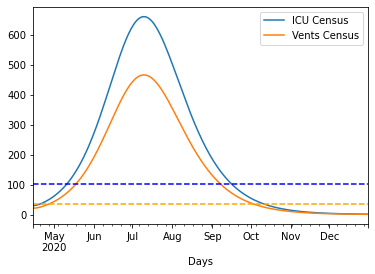

In [8]:
ax = mgh_projections.plot(x='Days', y=['ICU Census', 'Vents Census'])
plt.axhline(y=icu_capacity, color='blue', linestyle='--')
plt.axhline(y=vents_capacity, color='orange', linestyle='--')

In [11]:
icu_capacity = ma_hosp_res.query("HOSPITAL_NAME == 'George Washington Hospital'").reset_index()['NUM_ICU_BEDS'][0]

IndexError: index out of bounds

In [19]:
for x in hospital_resources['HOSPITAL_NAME']:
    if 'Howard' in x:
        print(x)
        
hospital_resources.query("HOSPITAL_NAME == 'Howard University Hospital'")

Howard County Medical Center
Community Howard Specialty Hospital (FKA West Campus Specialty Hospital - Howard Regional Health System)
Howard Memorial Hospital
Adventist Health Howard Memorial (FKA Frank R Howard Memorial Hospital)
Howard University Hospital
Ascension Howard Young Medical Center
Community Howard Regional Health
Regional Health Services of Howard County
Howard County General Hospital


,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
4306,-77.020442,38.917531,689,Howard University Hospital,Short Term Acute Care Hospital,2041 Georgia Ave NW,NaN,Washington,DC,20060.0,...,1.0,11001.0,482.0,200.0,36,36,0.0,0.560276,282,4.0
